# Basics

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
A = tf.placeholder(tf.float32, shape=(5,5), name='A')
v = tf.placeholder(tf.float32)

In [3]:
w = tf.matmul(A, v)

In [4]:
with tf.Session() as session:
    output = session.run(w, feed_dict={A: np.random.randn(5,5), v: np.random.randn(5,1)})
    print(output, type(output))

[[ 1.47648025]
 [ 2.91600657]
 [ 0.19459173]
 [-0.90879875]
 [ 1.47210813]] <class 'numpy.ndarray'>


In [5]:
shape=(2,2)
x = tf.Variable(tf.random_normal(shape))
t = tf.Variable(0)

In [6]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [7]:
with tf.Session() as session:
    out = session.run(init)
    print(x.eval())
    print(t.eval())

[[-1.0704788  -0.35410267]
 [ 2.56830359 -0.96897769]]
0


In [8]:
u = tf.Variable(20.0)
cost = u*u + u + 1
train_op = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

In [9]:
init = tf.global_variables_initializer()

In [10]:
with tf.Session() as session:
    session.run(init)
    for i in range(12):
        session.run(train_op)
        print("i = %d, cost %.3f, u = %.3f" % (i, cost.eval(), u.eval()))

i = 0, cost 67.990, u = 7.700
i = 1, cost 11.508, u = 2.780
i = 2, cost 2.471, u = 0.812
i = 3, cost 1.025, u = 0.025
i = 4, cost 0.794, u = -0.290
i = 5, cost 0.757, u = -0.416
i = 6, cost 0.751, u = -0.466
i = 7, cost 0.750, u = -0.487
i = 8, cost 0.750, u = -0.495
i = 9, cost 0.750, u = -0.498
i = 10, cost 0.750, u = -0.499
i = 11, cost 0.750, u = -0.500


# Building a neural network in tensorflow

In [11]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from util import get_normalized_data, y2indicator

def error_rate(p, t):
    return np.mean(p != t)

In [12]:
X, Y = get_normalized_data()

Reading in and transforming data...


In [13]:
max_iter = 15
print_period = 10

lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

# add an extra layer just for fun
M1 = 300
M2 = 100
K = 10
W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

/Users/admin/Code/udemy_courses/udemy_lazyprogrammer_courses/4_practical_deep_learning_tensorflow/util.py:104: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ind[i, y[i]] = 1


In [15]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))

train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.argmax(Yish, 1)

LL = []
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [16]:
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            
            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)
            

Cost / err at iteration i=0, j=0: 2353.444 / 0.902
Cost / err at iteration i=0, j=10: 1584.825 / 0.414
Cost / err at iteration i=0, j=20: 930.404 / 0.246
Cost / err at iteration i=0, j=30: 620.120 / 0.180
Cost / err at iteration i=0, j=40: 503.807 / 0.136
Cost / err at iteration i=0, j=50: 438.196 / 0.129
Cost / err at iteration i=0, j=60: 394.349 / 0.121
Cost / err at iteration i=0, j=70: 362.912 / 0.109
Cost / err at iteration i=0, j=80: 344.417 / 0.104
Cost / err at iteration i=1, j=0: 339.974 / 0.103
Cost / err at iteration i=1, j=10: 318.337 / 0.092
Cost / err at iteration i=1, j=20: 299.960 / 0.090
Cost / err at iteration i=1, j=30: 287.422 / 0.083
Cost / err at iteration i=1, j=40: 283.047 / 0.080
Cost / err at iteration i=1, j=50: 275.899 / 0.079
Cost / err at iteration i=1, j=60: 261.452 / 0.076
Cost / err at iteration i=1, j=70: 255.401 / 0.071
Cost / err at iteration i=1, j=80: 248.859 / 0.067
Cost / err at iteration i=2, j=0: 246.790 / 0.068
Cost / err at iteration i=2, j=1

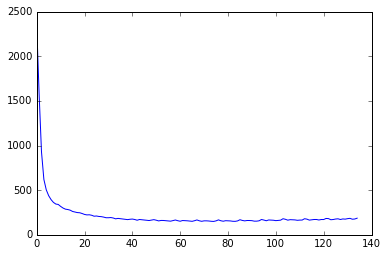

In [17]:
plt.plot(LL)
plt.show()